/home/dhanush/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2414: ComplexWarning: Casting complex values to real discards the imaginary part
  res = asanyarray(outputs, dtype=otypes[0])


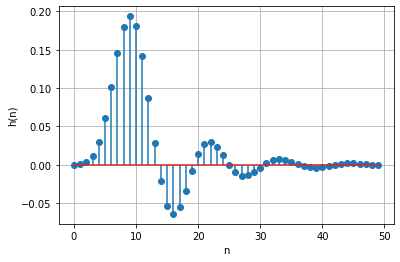

In [1]:
import soundfile as sf
import matplotlib.pyplot as plt
from scipy import signal
from scipy import vectorize as vec
import numpy as np

# read .wav file
input_signal, fs = sf.read('/home/dhanush/Downloads/filter_codes_filter_codes_Sound_Noise.wav')

# sampling frequency of Input signal
sampl_freq = fs

# order of the filter
order = 7

# cutoff frquency 4kHz
cutoff_freq = 4000.0

# digital frequency
Wn = 2 * cutoff_freq / sampl_freq

# b and a are numerator and denominator polynomials respectively
b, a = signal.butter(order, Wn, 'low')

# get partial fraction expansion
r, p, k = signal.residuez(b, a)

# number of terms of the impulse response
sz = 50
sz_lin = np.arange(sz)


def rp(x):
    return r @ (p ** x).T


rp_vec = vec(rp, otypes=['double'])

h1 = rp_vec(sz_lin)
k_add = np.pad(k, (0, sz - len(k)), 'constant', constant_values=(0, 0))
h = h1 + k_add
plt.stem(sz_lin, h)
plt.xlabel('n')
plt.ylabel('h(n)')
plt.grid()
plt.show()